# TEORÍA CUÁNTICA BÁSICA, OBSERVABLES Y MEDIDAS

## Primer sistema cuántico descrito en la sección 4.1.

## 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [3]:
import numpy as np
def norma(vec):
    norma = 0
    for i in range(len(vec)):
        n = abs(vec[i])**2
        norma += n
    return norma

def probabilidad_pos(vec, pos):
    norms = norma(v)
    c = abs(v[pos])**2
    return abs(c/norms)

pos = 2
vector = np.array([[-3-1j],[-2],[1j],[2]])
print("La probabiliodad de encontrarlo en una posicion es: ", probabilidad_pos(vector , pos))

La probabiliodad de encontrarlo en una posicion es:  [0.05263158]


# 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [2]:
import numpy as np
#Funcion para normalizar el vector
def normalized(vec):
    norma = np.linalg.norm(vec)
    normalizado = vec / norma
    return normalizado

#Funciion para calcular la probabilidad de los vectores 
def probabilidad_transicion(vec1, vec2):
    nvec1 = normalized(vec1)
    nvec2 = normalized(vec2) 
    
    inner = np.dot(nvec1, nvec2)
    probabilidad = np.abs(inner) ** 2
    return probabilidad

ket1 = np.array([1, 1j])
ket2 = np.array([1j, 1])
print("la probabilidad de transitcion es: ",  probabilidad_transicion(ket1, ket2)) 

la probabilidad de transitcion es:  0.9999999999999996


## Retos de programación del capítulo 4.

# 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación



In [3]:
#Funcion q define la amplitud de transicion 
def amplitud(vec1, vec2):
    nvec1 = normalized(vec1)
    nvec2 = normalized(vec2) 
    
    inner_product = np.dot(nvec1, nvec2)
    probabilidad = np.abs(inner_product) ** 2
    return probabilidad

vec1 = np.array([1/2, 1/3])
vec2 = np.array([1, 1])
print("la probabilidad de transitar de el uno al otro es: " , amplitud(vec1, vec2))

la probabilidad de transitar de el uno al otro es:  0.9615384615384612


# 2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [6]:
def hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def media(obs, ket):

    v1 = ket.conj().T
    v2 = np.dot(obs, ket)
    media = np.dot(v1, v2).real
    return media

def variance(obs, ket):
     v1 = ket.conj().T
     v2 = np.dot(obs, ket)
     variance = np.dot(v1, v2).real
     return variance - media(vec1, vec2) ** 2
   
obs = np.array([[1, -1j],[1j, 2]])
ket = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])


if hermitiana(obs):
    print(f"La media del observable es: {media(obs, ket)}")
    print(f"La varianza del observable es: {variance(obs, ket)}")
else:
    print("No es hermitiana")

La media del observable es: 0.5000000000000001
La varianza del observable es: [-0.19444444 -0.19444444]


# 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [7]:
def eigenvalues(obs):
    eigenvalues, eigenvectors = np.linalg.eig(obs)
    
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)

    return eigenvectors

def probabilidad_obs(eigenvectors, ket):
    ket_normal = normalized(ket)
    probabilidad = abs(np.dot(eigenvectors.conj(), ket_normal)) ** 2
    return probabilidad


obs = np.array([[-1, -1j], [1j, 1]])
ket = np.array([[1/2, 1/2]]).T
eigenvectors = eigenvalues(obs)
print("la probabilidad es" , probabilidad_obs(eigenvectors, ket))

Eigenvalues: [-1.41421356+0.j  1.41421356+0.j]
Eigenvectors:
 [[ 0.92387953+0.j         -0.        -0.38268343j]
 [-0.        -0.38268343j  0.92387953+0.j        ]]
la probabilidad es [[0.5]
 [0.5]]


# 4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [8]:
def estado_final(kinicial, matriz):
    kfinal = kinicial
    for m in matriz:
        kfinal = np.dot(m, kfinal)
    return kfinal


kinicial = np.array([1,0])
matrices = np.array([[1, 0], [0, 1]]), np.array([[0, 1], [1, 0]])
print(f"Estado final = {estado_final(kinicial, matrices)}")

Estado final = [0 1]


## Problemas como ejemplos

# Problema 4.3.1

In [ ]:
Sx = (1/np.sqrt(2)) * np.array([[0,1], [1, 0]])
initial_state = np.array([[1], [0]])
final = np.dot(Sx, initial_state)

ket1 = np.array([[1, 0]])
ket2 = np.array([[0, 1]])
spin_up = abs(np.dot(ket1, final)) ** 2 
spin_down = abs(np.dot(ket2, final)) ** 2

print(f"Probabilidad spin_up: {spin_up}")
print(f"Probabilidad spin_down: {spin_down}")  

# 4.3.2

# Grafico de Barras

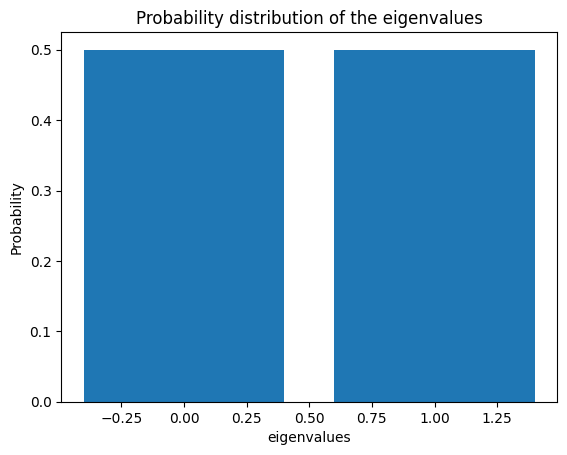

In [9]:
import matplotlib.pyplot as plt

# Datos
Sx = (1/np.sqrt(2)) * np.array([[0,1], [1, 0]])
initial_state = np.array([[1], [0]])
final = np.dot(Sx, initial_state)

eigenvalues, eigenvectors = np.linalg.eig(Sx)
probability = probabilidad_obs(eigenvectors, final)

# Crear el gráfico de barras
plt.bar(range(len(eigenvalues)), probability.flatten())

# Etiquetas y título
plt.xlabel('eigenvalues')
plt.ylabel('Probability')
plt.title('Probability distribution of the eigenvalues')

# Mostrar el gráfico
plt.show()

# 4.4.1

In [10]:
U1 = np.array([[0, 1], [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])
m_identidad = np.identity(U1.shape[0])
product = np.dot(U1, U2)

check_U1 = np.allclose(np.dot(U1, U1.conj().T) , m_identidad)
check_U2 = np.allclose(np.dot(U2, U2.conj().T) , m_identidad)
check_product = np.allclose(np.dot(product, product.conj().T), m_identidad)

if check_U1 == True:
    print("U1 es unitaria")
else:
    print("U1 No es unitaria")
if check_U2 == True:
    print("U2 es unitaria")
else:
    print("U2 No es unitaria")
if check_product:
    print("El prodcuto de U1 y U2 es unitarios")
else:
    print("El producto no es unitario")

U1 es unitaria
U2 es unitaria
El prodcuto de U1 y U2 es unitarios


# 4.4.2

In [12]:
A = np.array([[0  ,1/np.sqrt(2)  ,1/np.sqrt(2)  ,0], 
              [1j/np.sqrt(2),0   ,0  ,1/np.sqrt(2)], 
              [1/np.sqrt(2)  ,0  ,0  ,1j/np.sqrt(2)],
              [0  ,1/np.sqrt(2)  ,-1/np.sqrt(2)  ,0]])

initial_state = np.array([[1], [0], [0], [0]])
after_one_step = np.dot(A, initial_state )
after_two_step = np.dot(A, after_one_step )
after_three_step = np.dot(A, after_two_step )

print(f"Estado luego de 3 momentos : ")
print(after_three_step)
print(f"la probabilidad de encontrar la pelota cuantica en la posicion 3 es: {abs(after_three_step[2])}")

Estado luego de 3 momentos : 
[[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
la probabilidad de encontrar la pelota cuantica en la posicion 3 es: [0.]


# 4.5.2

In [2]:
import numpy as np

# Estados base de una partícula con spin-1/2
zero = np.array([1, 0])  # |0> estado (spin up)
one = np.array([0, 1])   # |1> estado (spin down)

print("Estado |0>:", zero)
print("Estado |1>:", one)

# Producto tensorial de dos partículas (spin-1/2)
def tensor_product(state1, state2):
    return np.kron(state1, state2)

# Crear los estados para dos partículas
state_00 = tensor_product(zero, zero)  # |00>
state_01 = tensor_product(zero, one)   # |01>
state_10 = tensor_product(one, zero)   # |10>
state_11 = tensor_product(one, one)    # |11>

print("Estado |00>:", state_00)
print("Estado |01>:", state_01)
print("Estado |10>:", state_10)
print("Estado |11>:", state_11)

# Coeficientes complejos para un estado generalizado
alpha_00 = 1/np.sqrt(2)
alpha_01 = 0
alpha_10 = 0
alpha_11 = 1/np.sqrt(2)

# Estado cuántico generalizado para dos partículas
general_state = alpha_00 * state_00 + alpha_11 * state_11

print("Estado cuántico generalizado:", general_state)

# Producto tensorial de n partículas
def n_particle_tensor_product(states):
    result = states[0]
    for state in states[1:]:
        result = tensor_product(result, state)
    return result

# Crear un estado cuántico para 3 partículas, por ejemplo |0>|1>|0>
n_states = [zero, one, zero]
n_particle_state = n_particle_tensor_product(n_states)

print("Estado cuántico para 3 partículas (|0>|1>|0>):", n_particle_state)

# Estado entrelazado de Bell (|Φ+> = 1/sqrt(2) * (|00> + |11>))
bell_state = (1/np.sqrt(2)) * (state_00 + state_11)

print("Estado de Bell |Φ+>:", bell_state)

SyntaxError: invalid non-printable character U+00A0 (3205425484.py, line 52)

# 4.5.3

In [1]:
import numpy as np

# Define the spin basis vectors for up and down states
up = np.array([1, 0])    # |↑>
down = np.array([0, 1])  # |↓>

# Tensor product function
def tensor_product(state1, state2):
    return np.kron(state1, state2)

# Create the entangled Bell state (|ψ> = (|↑L↓R> + |↓L↑R>)/√2)
bell_state = (1/np.sqrt(2)) * (tensor_product(up, down) + tensor_product(down, up))

# Print the Bell state
print("Entangled Bell state |ψ>:\n", bell_state)


ModuleNotFoundError: No module named 'numpy'